# Segunda Práctica: Determinación de tipos de estrellas mediante técnicas de aprendizaje no supervisado

Enlace a repositorio en GitHub: https://github.com/alejandrojimenezvalero/star_clustering

El objetivo de esta práctica es la determinación de tipos de estrellas en diferentes categorías en base a una serie de variables como la temperatura promedio en la superficie, la luminosidad, el radio, la magnitud absoluta, la clasificación espectral y el color. 

En sí, en la práctica se utilizarán algoritmos de agrupamiento o clustering. El clustering es un método de aprendizaje no supervisado, que consiste en organizar un conjunto de objetos o datos en grupos o clústeres basados en su similitud. El objetivo principal del agrupamiento es identificar patrones intrínsecos en los datos y agrupar elementos que comparten características similares en el mismo clúster, mientras que los elementos de diferentes clústeres son distintos entre sí. Esta técnica es especialmente útil cuando no tenemos información previa sobre la estructura de los datos y queremos explorar y comprender su organización interna. 

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Implementación del algoritmo k-means

El algoritmo K-Means es un método de agrupamiento de datos que busca dividir un conjunto de datos en K grupos (clusters) distintos. El objetivo es asignar cada dato a un cluster de manera que se minimice la suma de las distancias entre los datos y el centroide de su respectivo cluster. Los pasos son los siguientes:

- Inicialización: El algoritmo comienza seleccionando aleatoriamente K puntos como centroides iniciales. Estos puntos podrían ser datos reales del conjunto de datos o seleccionados aleatoriamente.
- Asignación de datos a clusters: Cada dato del conjunto de datos se asigna al cluster cuyo centroide esté más cercano. La distancia más comúnmente utilizada es la distancia euclidiana.
- Actualización de centroides: Una vez que todos los datos han sido asignados a los clusters, se calcula el nuevo centroide de cada cluster como la media de todos los datos asignados a ese cluster.
- Repetición: Los pasos 2 y 3 se repiten hasta que los centroides ya no cambian significativamente o se alcanza un número máximo de iteraciones.

El resultado del algoritmo es una partición del conjunto de datos en K clusters, donde cada dato está asignado a un cluster específico.

In [518]:
# Planteamos una clase que representará a un objeto K-Means, que se podrá inicializar con parámetros k (número de clusters) y max_iter (número de iteraciones máximo en caso de no convergencia)
class MyKMeans:
    def __init__(self, k, max_iter=300):
        self.k = k
        self.max_iter = max_iter

    def fit(self, df):
        """El método fit implementa el algoritmo de K-Means sobre un conjunto de datos X"""
   
        # Establecemos la semilla garantizando que el comportamiento de la función sea reproducible
        np.random.seed(100444571)
        
        # Transformamos los datos a una matriz de numpy
        X = df.values
        # Inicializar k centroides aleatoriamente: esta será la matriz de los centroides
        centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for _ in range(self.max_iter):
            
            # Calcular la distancia entre cada punto de datos y todos los centroides
            distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
   
            # Encontrar el índice del centroide más cercano para cada punto de datos
            labels = np.argmin(distances, axis=1)

            # Inicializar new_centroids para actualizar los centroides
            new_centroids = np.zeros_like(centroids)

            # Actualizar los centroides como la media de los puntos asignados a cada uno
            for i in range(len(centroids)):
                puntos_asignados = X[labels == i]
                if len(puntos_asignados) > 0:
                    new_centroids[i] = np.mean(puntos_asignados, axis=0)

            # Comprobar convergencia
            if np.all(centroids == new_centroids):
                break
            
            centroids = new_centroids

        self.centroids = centroids
        self.labels = labels

    def predict(self, df):
        X = df.values
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)



### 1.1 Comparativa K-Means implementación propia y Scikit-Learn

#### Eficiencia e implementación

La comparación entre la implementación personalizada del algoritmo K-Means y la implementación proporcionada por la biblioteca scikit-learn revela diferencias significativas en términos de eficiencia y detalles de implementación.

La implementación de K-Means en scikit-learn se destaca por su eficiencia computacional, gracias a su código optimizado en C y al empleo de técnicas avanzadas como la inicialización k-means++. Estas características garantizan un rendimiento óptimo incluso en conjuntos de datos de gran escala. Además, la API de scikit-learn proporciona una interfaz coherente y fácil de usar, permitiendo una configuración flexible de parámetros como el número de clusters, el número máximo de iteraciones y los criterios de parada.

Por otro lado, la implementación personalizada exhibe una estructura más simple y transparente, lo que facilita la comprensión de los detalles internos del algoritmo K-Means. Sin embargo, carece de algunas optimizaciones avanzadas presentes en scikit-learn, como la inicialización k-means++ y el soporte para múltiples hilos de ejecución. Esto puede resultar en un rendimiento inferior en términos de velocidad de ejecución, especialmente en conjuntos de datos grandes.

En resumen, si se busca una implementación eficiente y fácil de usar, se recomienda utilizar la implementación de scikit-learn. Por el contrario, si se requiere un mayor control sobre los detalles de implementación o se desea comprender profundamente el funcionamiento del algoritmo, la implementación personalizada puede servir como punto de partida para investigaciones adicionales o personalizaciones específicas.

De todas maneras, lo normal sería que en cuanto a tiempo de ejecución, la implementación propia del algoritmo tomase un menor tiempo debido a que es mucho más simple que la implementación de sk-learn

#### Comparativa de resultados

Para comparar los resultados de ambas implementaciones del algoritmo, se puede crear un conjunto de datos sintético para ver cúal de los algoritmos agrupa mejor dicho conjunto de datos.

Text(0.5, 1.0, 'Datos simulados')

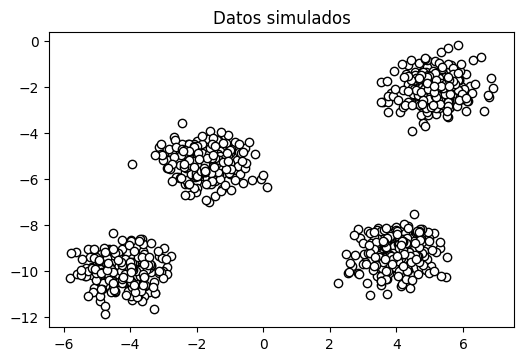

In [519]:
from sklearn.datasets import make_blobs

# Simulación de datos
X, y = make_blobs(
    n_samples    = 1000,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = 100454471
)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados')

La implementación de sklearn.cluster.KMeans tiene los siguientes parámetros:

- n_clusters: determina el número 𝐾 de clusters que se van a generar.
- init: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.
- n_init: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.
- max_iter: número máximo de iteraciones permitidas.
random_state: semilla para garantizar la reproducibilidad de los resultados.

In [520]:
from sklearn.preprocessing import scale
#escalado de datos
X_scaled = scale(X)

In [521]:
from sklearn.cluster import KMeans
modelo_kmeans_sk = KMeans(n_clusters=4, n_init=25, random_state=100454471)
modelo_kmeans_sk.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=100454471)

El objeto devuelto por KMeans() contiene entre otros datos: la media de cada una de las variables para cada cluster (cluster_centers_), es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación (.labels_) y la suma total de cuadrados internos de todos los clusters (.inertia_).

In [522]:
y_predict = modelo_kmeans_sk.predict(X=X_scaled)

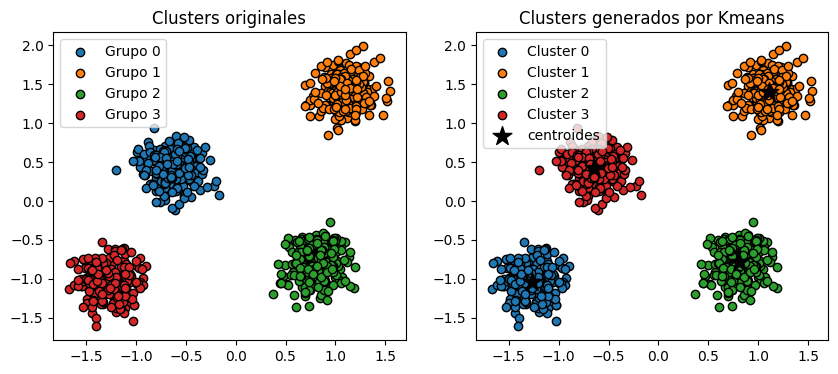

In [523]:
# Representación gráfica: grupos originales vs clusters creados
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = modelo_kmeans_sk.cluster_centers_[:, 0],
    y = modelo_kmeans_sk.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

Podemos ver también el número de aciertos y errores. Podemos verlo como una matriz de confusión. Aquí hay que tener cuidado que Kmeans asigna un cluster cuyo número puede ser distinto. Por lo tanto, cada fila tiene que tener un número alto (aciertos) y en las demás posiciones valores bajos (errores de clasificación)

In [524]:
# Matriz de confusión: grupos originales vs clusters creados
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,0,0,0,250
1,0,250,0,0
2,0,0,250,0
3,250,0,0,0


Hacemos análogamente el proceso para la implementación propia del K-Means.

In [525]:
modelo_my_kmeans = MyKMeans(k=4)
# Pasamos X_scaled a dataframe ya que la implementación propia recibe este objeto de pandas
X_scaled_df = pd.DataFrame(X_scaled)
modelo_kmeans_sk.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=100454471)

In [526]:
y_predict = modelo_kmeans_sk.predict(X=X_scaled)

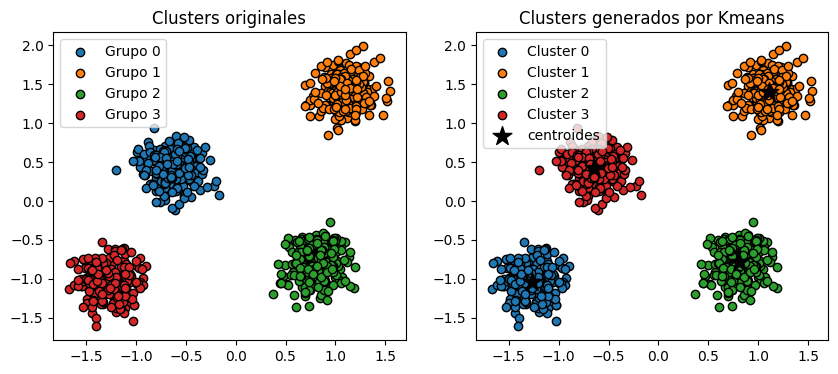

In [527]:
# Representación gráfica: grupos originales vs clusters creados
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend()

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = modelo_kmeans_sk.cluster_centers_[:, 0],
    y = modelo_kmeans_sk.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend()

In [528]:
# Matriz de confusión: grupos originales vs clusters creados
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster,0,1,2,3
grupo_real,,,,
0,0,0,0,250
1,0,250,0,0
2,0,0,250,0
3,250,0,0,0


Como se puede apreciar, con este fichero sintético y para los parámetros definidos, la implementación propia de k-Means agrupa los datos correctamente igual que la implementación de scikit-learn

## 2. Tratamiento y codificación de los datos

In [529]:
# Cargamos el fichero de datos disponible para la práctica
stars_data = pd.read_csv('stars_data.csv')

In [530]:
stars_data.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


In [531]:
stars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB


Como puede observarse no existen valores nulos en el conjunto de datos, con un total de 240 ocurrencias.

Por tanto, en este momento se hace necesario preparar el fichero de datos para que se pueda aplicar el algoritmo de agrupación. Las variables categóricas como el color de la estrella y la clase espectral deben ser codificadas de manera que puedan ser tratadas numéricamente. 

Las opciones son, por un lado realizar one-hot-encoding, o codificar como una variable ordinal. En uno de los puntos de la práctica se pide discutir los resultados que se obtienen en función del método que se aplica para codificar estas variables, por lo que se realizarán ambos métodos. En primera instancia vamos a relizar one-hot-encoding para ambas variables.

En el caso de la variable categórica color, primeramente debemos de saber cuantos colores diferentes puede haber, puesto que el one-hot encoding es una técnica utilizada para convertir variables categóricas en un formato de vector binario de manera que tomará valor 0 en todos los colores que no sean, y valor 1 en el color que sea. One hot encoding se usa principalmente cuando no existe relación jerárquica entre los valores, mientras que el uso de codificación como una variable ordinal implica necesariamente la existencia de un orden. 

En un principio podríamos pensar que los colores no siguen ningún orden jerárquico, pero en el caso de las estrellas, el color está asociado intrínsecamente con la cantidad de energía de la estrella. Para codificar ordinalmente el color, habría que identificar la jerarquía de colores en función de la cantidad de energía. Por tanto, es un buen ejercicio el ver cómo cambian los resultados aplicando estos dos métodos de transformación de datos categóricos.

In [532]:
n_colors = stars_data['Color'].nunique()
print("Numero de colores diferentes: ", n_colors)

Numero de colores diferentes:  17


Aplicamos lo misma lógica para la columna de la clase espectral, para saber cuántas clases diferentes existen:

In [533]:
n_classes = stars_data['Spectral_Class'].nunique()
print("Numero de clases diferentes: ", n_classes)

Numero de clases diferentes:  7


In [534]:
print("Clases espectrales: ", stars_data['Spectral_Class'].unique())
print("Colores: ", stars_data['Color'].unique())

Clases espectrales:  ['M' 'B' 'A' 'F' 'O' 'K' 'G']
Colores:  ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']


No obstante, se pueden agrupar los colores por similitud en clases jerárquicamente superiores de manera que se simplifica el número de atributos.

In [535]:
mapping = {  
    'Red': ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['yellowish', 'Yellowish'],
    'White-Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

In [536]:
# Mapeamos los datos
for target_color, source_colors in mapping.items():
  stars_data.loc[stars_data.Color.isin(source_colors), 'Color'] = target_color

In [537]:
# Comprobamos que los valores están unificados.
stars_data.Color.unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Yellow-Orange',
       'Blue', 'Orange', 'Yellow', 'Orange-Red'], dtype=object)

### 2.1 Codificación mediante one-hot-encoding


El "one-hot encoding" es una técnica utilizada en el procesamiento de datos y el aprendizaje automático para representar variables categóricas como vectores binarios. En este método, cada valor único de una variable categórica se representa como un vector donde todos los elementos son cero, excepto uno que indica la presencia del valor correspondiente.

Para realizar one-hot encoding utilizamos OneHotEncoder de la librería de sklearn:

In [538]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(stars_data[['Color', 'Spectral_Class']])

In [539]:
ohetransform.head()

,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Ahora se debe concatenar el dataframe original con el dataframe obtenido de la codificación, quitando la columna referida al color que se tenía inicialmente.

In [540]:
stars_data_ohe = pd.concat([stars_data, ohetransform], axis=1).drop(columns=['Color', 'Spectral_Class'])
stars_data_ohe.head()

,Temperature,L,R,A_M,Color_Blue,Color_Blue-White,Color_Orange,Color_Orange-Red,Color_Red,Color_White,Color_White-Yellow,Color_Yellow,Color_Yellow-Orange,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Así, se tiene primeramente el fichero preparado (stars_data_ohe) mediante one-hot encoding para sendas variables categóricas. 

### 2.2 Codificación mediante variables ordinales

Creamos un fichero copia del original para tenerlo preparado mediante la utilización de esta técnica, para posteriormente realizar las comparaciones entre las dos técnicas usadas para la codificación de variables categóricas.

In [541]:
stars_data_ordinal = stars_data.copy()

En este punto vamos a realizar la codificación de las dos variables categóricas como variables ordinales. En este caso vamos a utilizar OrdinalEncoder de sklearn. La motivación para utilizar este tipo de codificación es el hecho de que existe una clasificación inherente a cada variable categórica. En el caso de la clase espectral, se sabe que es una secuencia (O, B, A, F, G, K, M) que se asocia a las estrellas desde las más calientes O, hasta las más frías M. En el caso del color ocurre algo parecido, a color más tendiente a amarillo más energética es la estrella.

Es importante el orden, por tanto para las clases espectrales:

In [542]:
from sklearn.preprocessing import OrdinalEncoder

# Array de clases espectrales ordenadas de menos a más en función de la temperatura en la superficie de la estrella
classes = ['M','K','G','F','A','B','O']

# Crear una instancia de OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [classes])

# Ajustar, transformar los datos, y reemplazar la columna original con los datos codificados
stars_data_ordinal['Spectral_Class'] =  ordinal_encoder.fit_transform(stars_data[['Spectral_Class']])

En el caso del color, este está relacionado con la energía emitida por ellas. Esta relación se basa en la temperatura efectiva de la superficie de la estrella. La temperatura efectiva determina la distribución espectral de la radiación que emite una estrella, y esto a su vez afecta el color percibido por los observadores.

La relación básica entre el color y la temperatura efectiva de una estrella se puede describir utilizando la ley de desplazamiento de Wien y la distribución de Planck. En términos generales, las estrellas más calientes tienden a emitir más luz en longitudes de onda más cortas (azules y violetas), mientras que las estrellas más frías emiten más luz en longitudes de onda más largas (rojas y naranjas).

Por lo tanto, en astronomía, los colores de las estrellas se suelen clasificar en una secuencia que va desde azul (estrellas más calientes) hasta rojo (estrellas más frías), pasando por blanco y amarillo, entre otros.

Es importante tener en cuenta que, si bien esta relación general entre el color y la temperatura efectiva es válida, también existen otros factores que pueden influir en el color percibido de una estrella, como su composición química, su edad y su distancia a la Tierra. No obstante, esto no se tendrá en cuenta en la determinación del orden.

In [543]:
# Array de colores ordenados de manera creciente en base a la temperatura

colors = ['Red', 'Orange-Red', 'Orange', 'Yellow-Orange', 'Yellow', 'White-Yellow', 'White', 'Blue', 'Blue-White']

# Crear una instancia de OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [colors])

# Ajustar, transformar los datos, y reemplazar la columna original con los datos codificados
stars_data_ordinal['Color'] =  ordinal_encoder.fit_transform(stars_data[['Color']])

In [544]:
stars_data_ordinal.sample(n=10)

,Temperature,L,R,A_M,Color,Spectral_Class
105,14245,231000.00000,42.0000,-6.12,7.0,6.0
9,2700,0.00018,0.1300,16.05,0.0,0.0
175,3614,145000.00000,1553.0000,-7.71,0.0,0.0
135,3243,0.00230,0.7300,14.75,0.0,0.0
46,3575,123000.00000,45.0000,-6.78,0.0,0.0
139,3541,0.00130,0.2560,14.33,0.0,0.0
158,13023,998.00000,6.2100,-1.38,8.0,4.0
18,3192,0.00362,0.1967,13.53,0.0,0.0
152,14060,1092.00000,5.7450,-2.04,8.0,4.0
169,9373,424520.00000,24.0000,-5.99,7.0,6.0


Como se puede apreciar, se ha realizado una codificación en variables ordinales para el color y la clase espectral. 

## 3. Extracción de componenetes principales mediante PCA

PCA, que significa Análisis de Componentes Principales (Principal Component Analysis en inglés), es una técnica de reducción de dimensionalidad utilizada en el campo del aprendizaje automático y la estadística. Su objetivo principal es reducir la cantidad de variables en un conjunto de datos mientras se conserva la mayor cantidad posible de información.

Imagina que tienes un conjunto de datos con muchas características o variables. PCA busca transformar estos datos en un nuevo conjunto de variables llamadas componentes principales. Estas componentes principales son combinaciones lineales de las características originales y están ordenadas de manera que la primera componente principal captura la mayor variabilidad posible en los datos, la segunda componente principal captura la siguiente mayor variabilidad, y así sucesivamente.

Entonces, ¿para qué sirve PCA en machine learning?

- Reducción de dimensionalidad: Uno de los usos más comunes de PCA es reducir la dimensionalidad de los datos. Esto es útil cuando tienes un gran número de características y quieres simplificar el modelo sin perder demasiada información. Al reducir la dimensionalidad, también puedes disminuir la complejidad computacional de tus algoritmos.
- Visualización de datos: PCA también se utiliza para visualizar datos de alta dimensionalidad en un espacio de dimensiones más bajas (generalmente 2 o 3 dimensiones) para facilitar su comprensión. Al proyectar los datos en un espacio de menor dimensión mientras se conserva la mayor cantidad posible de información, se pueden visualizar relaciones y estructuras en los datos que pueden no ser evidentes en dimensiones más altas.
- Preprocesamiento de datos: PCA a menudo se utiliza como una etapa de preprocesamiento antes de aplicar otros algoritmos de aprendizaje automático. Al reducir la dimensionalidad de los datos, se pueden eliminar características redundantes o irrelevantes, lo que puede mejorar el rendimiento de los modelos de machine learning al reducir el riesgo de sobreajuste y mejorar la generalización.

In [545]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  PCA para reducir a dos las dimensiones
pca = PCA(n_components=2)

# Escalador para normalizar los datos numéricos
scaler = StandardScaler()


### 3.1 PCA para datos con one-hot-encoding

In [546]:
# Estandarización de los datos antes de aplicar PCA
# En one-hot-encoding no se escalan las variables categóricas codificadas como vectores
stars_data_ohe_scaled = scaler.fit_transform(stars_data_ohe)
X_ohe = pca.fit_transform(stars_data_ohe_scaled)

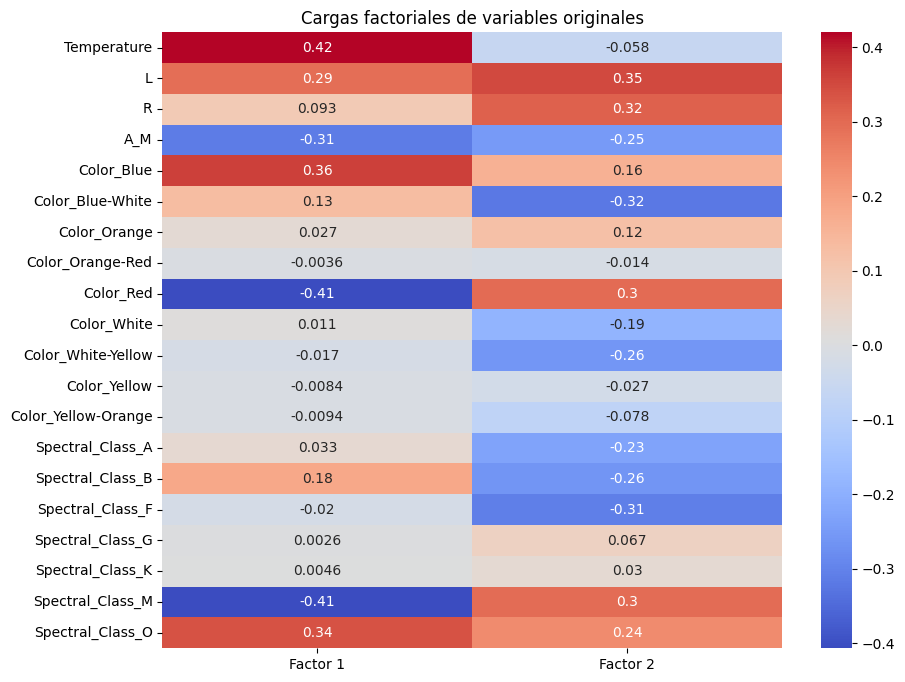

In [547]:
# Obtener los loadings (cargas)
loadings = pd.DataFrame(pca.components_.T, columns=['Factor 1', 'Factor 2'], index=stars_data_ohe.columns)
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Cargas factoriales de variables originales')
plt.show()

Para determinar qué variables podrían ir en cada factor, debemos examinar los loadings y enfocarnos en las variables que tienen loadings más altos (positivos o negativos) en cada factor. Consideramos significativa una carga factorial si es mayor a 0.3 en valor absoluto (es decir, mayor a 0.3 o menor a -0.3):

Factor 1: Este factor parece estar relacionado principalmente con la temperatura (positivamente) y con ciertas categorías específicas de color y clasificación espectral. Las variables con cargas factoriales más altas en el Factor 1 incluyen Temperature, Color_Red, Spectral_Class_O y Spectral_Class_M. Esto sugiere que este factor está asociado con estrellas más cálidas (Temperature alta), así como con ciertos colores y clasificaciones espectrales. Esto podría interpretarse como un factor relacionado con la temperatura y las propiedades espectrales de las estrellas.

Factor 2: Este factor parece estar relacionado principalmente con la luminosidad (L), y el radio (R), así con algunas categorías adicionales de color y clasificación espectral. Las variables con cargas factoriales más altas en el Factor 2 incluyen L, R.  Esto podría interpretarse como un factor relacionado con el tamaño y la luminosidad de las estrellas.


In [548]:
stars_data_ohe_pca_df = pd.DataFrame(data=X_ohe, columns=['Propiedades Físicas', 'Características Espectrales y Cromáticas'])
stars_data_ohe_pca_df.head()

,Propiedades Físicas,Características Espectrales y Cromáticas
0,-2.273159,0.371693
1,-2.288643,0.360410
2,-2.370841,0.313063
3,-2.300798,0.360701
4,-2.440581,0.284710


### 3.2 PCA para fichero codificado con variables ordinales

In [549]:
# En codificación ordinal sí escalamos todos los datos
stars_data_ordinal_scaled = scaler.fit_transform(stars_data_ordinal)

X_ordinal = pca.fit_transform(stars_data_ordinal_scaled)

                Factor 1  Factor 2
Temperature     0.472166 -0.211441
L               0.367041  0.411251
R               0.175378  0.625955
A_M            -0.405233 -0.399072
Color           0.456773 -0.365538
Spectral_Class  0.488597 -0.318543


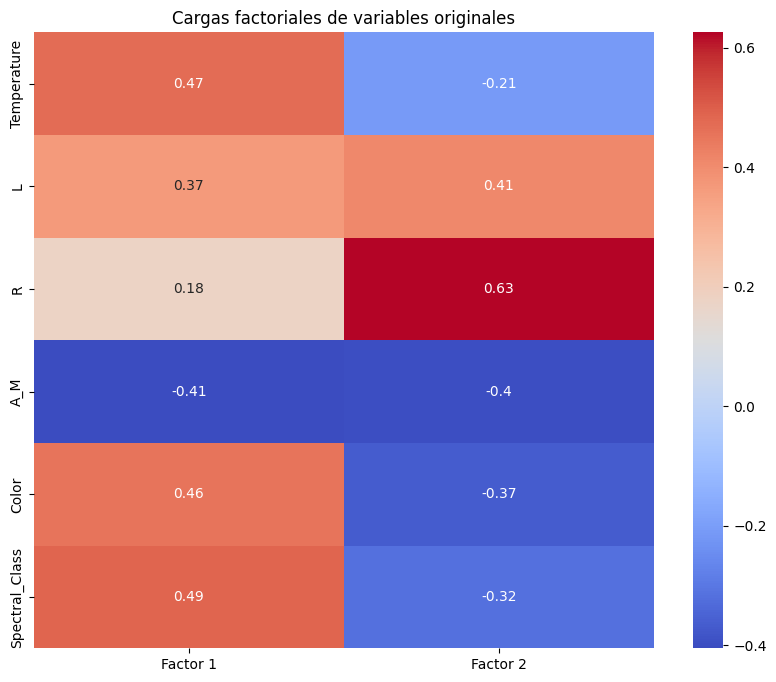

In [550]:
# Obtener los loadings (cargas)
loadings = pd.DataFrame(pca.components_.T, columns=['Factor 1', 'Factor 2'], index=stars_data_ordinal.columns)
print(loadings)
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Cargas factoriales de variables originales')
plt.show()

Similar al caso anterior, parece que hay dos factores latentes subyacentes en tus datos. Estos factores pueden interpretarse como sigue:

Factor 1:  Las cargas factoriales más altas para Temperature, Color y Spectral_Class en el Factor 1 indican que estas variables están fuertemente asociadas con este factor. Por otro lado, A_M tiene una carga negativa en Factor 1, lo que sugiere una asociación negativa con este factor. Esto podría interpretarse como un factor relacionado con la temperatura y las propiedades espectrales de las estrellas.

Factor 2: Las cargas factoriales más altas para L y R en el Factor 2 indican que estas variables están fuertemente asociadas con este factor. A_M también tiene una carga negativa en Factor 2, lo que sugiere una asociación negativa. Esto podría interpretarse como un factor relacionado con el tamaño y la luminosidad de las estrellas.

In [551]:
stars_data_ordinal_pca_df = pd.DataFrame(data=X_ordinal, columns=['Temperatura y Propiedades Espectrales', 'Tamaño y Luminosidad'])
stars_data_ordinal_pca_df.head()

,Temperatura y Propiedades Espectrales,Tamaño y Luminosidad
0,-2.077893,-0.120871
1,-2.097693,-0.138539
2,-2.200569,-0.208532
3,-2.111605,-0.135062
4,-2.285744,-0.245507


Como puede apreciarse las contribuciones a las variables a cada factor se asemeja en gran medida aunque la codificación de las variables categóricas sea diferente.

## 4. Clustering

En este apartado se van a aplicar algortimos de agrupamiento o clustering sobre los dos conjuntos de datos: stars_data_ordinal_pca (dataframe que contiene los datos de las estrellas con las variables categóricas codificadas como variables ordinales) y stars_data_ohe_pca (dataframe que contiene los datos de las estrellas con las variables categóricas codificadas con one-hot-encoding).

Los algoritmos de clustering generalmente esperan una matriz de datos (NumPy array), por lo que de aquí de en adelante se trabajará con estos objetos.

### 4.1 Métricas para evaluar el rendimiento 

Para evaluar la eficiencia del algoritmo de clustering K-means, puedes utilizar varias métricas. Aquí hay algunas de las más comunes:

- Inercia (Within-Cluster Sum of Squares): Es la suma de las distancias cuadradas de cada punto al centroide de su cluster más cercano. Una inercia más baja indica una mejor separación entre los clusters. Sin embargo, esta métrica puede ser engañosa si el número de clusters no es el adecuado.

- Coeficiente de Silueta: Mide qué tan bien separados están los clusters. Toma en cuenta tanto la distancia entre puntos dentro de un cluster como la distancia entre clusters vecinos. Un coeficiente de silueta más alto (cerca de 1) indica clusters bien definidos, mientras que un valor cercano a -1 indica que los puntos están asignados incorrectamente a los clusters.

- Índice Calinski-Harabasz (Variance Ratio Criterion): Es la razón entre la dispersión intra-cluster y la dispersión inter-cluster. Un valor más alto indica clusters más compactos y bien separados.

In [552]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

### 4.2 Clustering con algoritmo K-Means

#### 4.2.1 Determinación del número de clusters para K-Means

Una técnica importante antes de aplicar el algoritmo de K-Means para predicción es estudiar el número de clusters en los que agrupar lo datos. Esto es para encontrar el número óptimo de clusters (K) para resolver el problema de agrupación.

##### 4.2.1.1 Elbow Method

La solución al problema anterior es hacer una búsqueda de cual sería el K mejor. La idea es obtener para valor de K la suma de los cuadrados de la distancia de cada punto con el centroide al que se encuentra asignado (se obtiene de .inertia_). Es una medida de lo coherentes que son internamente los clusters. La idea es que si K crece el valor de .inertia_ es menor porque cada cluster es más pequeño. Sin embargo, a partir de cierto punto, la adición de más clusters proporciona rendimientos decrecientes en términos de reducción de .inertia_, y la tasa de disminución se ralentiza, formando un codo en el gráfico. Ese sería el valor óptimo para seleccionar.

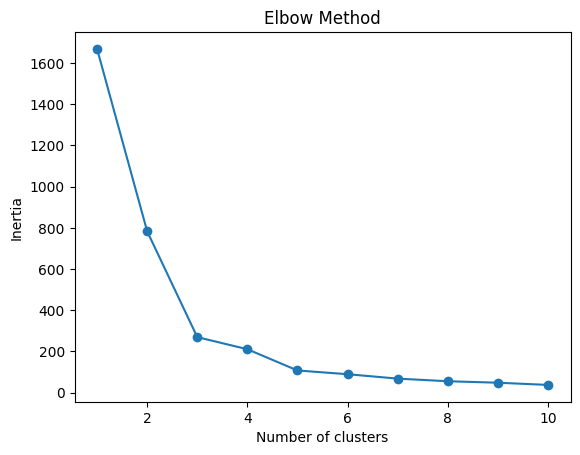

In [553]:
from sklearn.cluster import KMeans
# Entrena el modelo K-means con diferentes números de clusters y calcula la inercia
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=100454471)
    kmeans.fit(X_ohe)
    inertia.append(kmeans.inertia_)

# Grafica la inercia en función del número de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

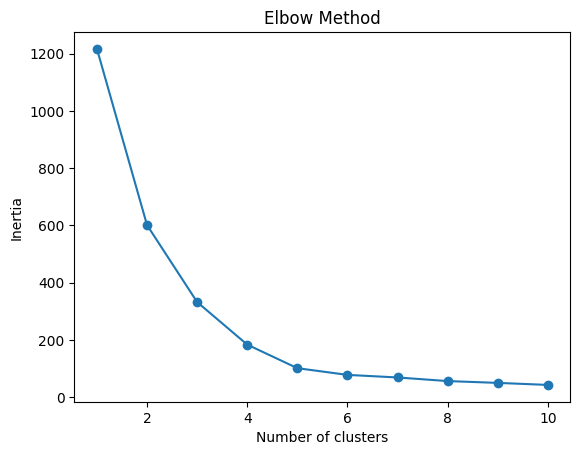

In [554]:
# Entrena el modelo K-means con diferentes números de clusters y calcula la inercia
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=100454471)
    kmeans.fit(X_ordinal)
    inertia.append(kmeans.inertia_)

# Grafica la inercia en función del número de clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Utilizando el "Elbow Method", se puede apreciar que a partir de un k = 4 la mejora ya 
que no compensa aumentar la complejidad del modelo por la poca ganancia en el ajuste.


##### 4.2.1.2 Método de Silhouette

Algunas veces, con el método Elbow es difícil determinar en número óptimo de clusters. Otra aproximación es el método Silhouette. Utiliza la distancia media intraclúster y la distancia media clúster más cercano para cada muestra. Cuanto mayor sea el valor de la puntuación, mejor será la estimación. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un número óptimo de clusters. Los valores se sitúan entre -1,0 y 1,0.

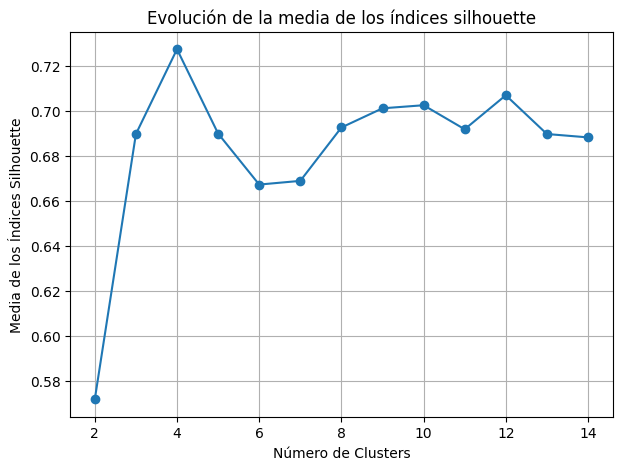

In [555]:

# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters=n_clusters,
        n_init=20,
        random_state=100454471
    )
    cluster_labels = modelo_kmeans.fit_predict(X_ohe)
    silhouette_avg = silhouette_score(X_ohe, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Plotear los resultados
plt.figure(figsize=(7, 5))
plt.plot(range_n_clusters, valores_medios_silhouette, marker='o', linestyle='-')
plt.title("Evolución de la media de los índices silhouette")
plt.xlabel('Número de Clusters')
plt.ylabel('Media de los Índices Silhouette')
plt.grid(True)
plt.show()

En este caso se aprecia que el número de clusters óptimo para el conjunto de datos con variables codificadas con one-hot-encoding es 4, de acuerdo al método de análisis.

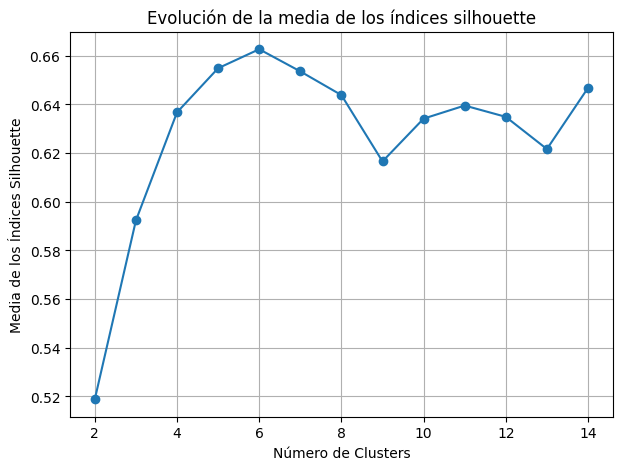

In [556]:
# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters=n_clusters,
        n_init=20,
        random_state=100454471
    )
    cluster_labels = modelo_kmeans.fit_predict(X_ordinal)
    silhouette_avg = silhouette_score(X_ordinal, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Plotear los resultados
plt.figure(figsize=(7, 5))
plt.plot(range_n_clusters, valores_medios_silhouette, marker='o', linestyle='-')
plt.title("Evolución de la media de los índices silhouette")
plt.xlabel('Número de Clusters')
plt.ylabel('Media de los Índices Silhouette')
plt.grid(True)
plt.show()

En este caso se aprecia que el número de clusters óptimo para el conjunto de datos con variables ordinales es 6, de acuerdo al método de análisis.

#### 4.2.2 Predicción K-Means 

Por tanto, teniendo en cuenta estos resultados obtenidos a priori de la aplicación del algoritmo, se sabe de antemano los clusters a aplicar en cada caso.

##### 4.2.2.1 Predicción para el conjunto de datos con variables codificadas como ordinales

Text(0.5, 1.0, 'Datos sin clusterizar')

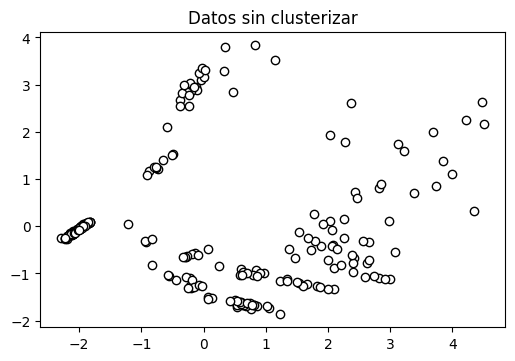

In [557]:
# Graficamos a priori los datos
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X_ordinal[:, 0],
    y = X_ordinal[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos sin clusterizar')

In [558]:
# Se crea el objeto K-Means con los clusters 
kmeans = KMeans(n_clusters=6, n_init=25, random_state=100454471)
# Entrenamos el algoritmo de Kmeans 
kmeans.fit(X_ordinal)
# Predicciones
predictions_ordinal = kmeans.predict(X_ordinal)

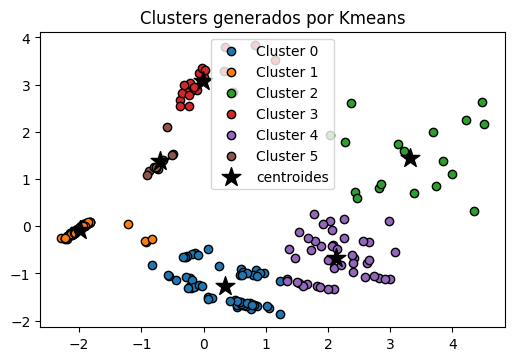

In [559]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))

for i in np.unique(predictions_ordinal):
    ax.scatter(
        x = X_ordinal[predictions_ordinal == i, 0],
        y = X_ordinal[predictions_ordinal == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax.scatter(
    x = kmeans.cluster_centers_[:, 0],
    y = kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax.set_title('Clusters generados por Kmeans')
ax.legend()

plt.show()

In [560]:
# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_ordinal, predictions_ordinal)
print("Coeficiente de Silueta:", silhouette_avg)

# Calcular el índice Calinski-Harabasz
ch_score = calinski_harabasz_score(X_ordinal, predictions_ordinal)
print("Índice Calinski-Harabasz:", ch_score)

Coeficiente de Silueta: 0.6627218475141597
Índice Calinski-Harabasz: 688.5101893111259


##### 4.2.2.2 Predicción para el conjunto de datos con one-hot encoding para variables

Text(0.5, 1.0, 'Datos sin clusterizar')

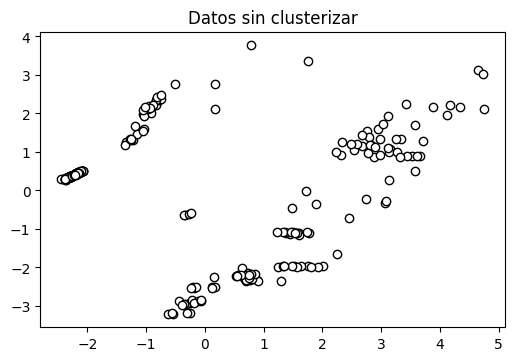

In [561]:
# Graficamos a priori los datos
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X_ohe[:, 0],
    y = X_ohe[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos sin clusterizar')

In [562]:
# Se crea el objeto K-Means con los clusters 
kmeans = KMeans(n_clusters=4, max_iter=10, random_state=100454471)
# Entrenamos el algoritmo de Kmeans 
kmeans.fit(X_ohe)
# Predicciones
predictions_ohe = kmeans.predict(X_ohe)


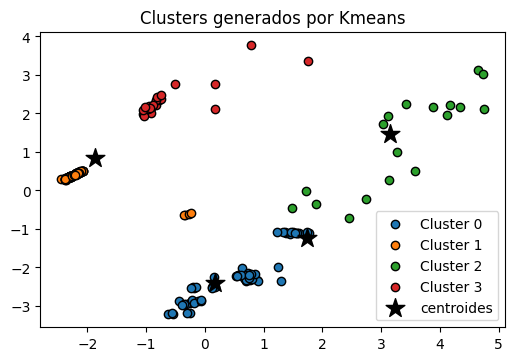

In [563]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))

for i in np.unique(predictions_ohe):
    ax.scatter(
        x = X_ohe[predictions_ordinal == i, 0],
        y = X_ohe[predictions_ordinal == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax.scatter(
    x = kmeans.cluster_centers_[:, 0],
    y = kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax.set_title('Clusters generados por Kmeans')
ax.legend()

plt.show()

In [564]:
# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(X_ohe, predictions_ohe)
print("Coeficiente de Silueta:", silhouette_avg)

# Calcular el índice Calinski-Harabasz
ch_score = calinski_harabasz_score(X_ohe, predictions_ohe)
print("Índice Calinski-Harabasz:", ch_score)

Coeficiente de Silueta: 0.6420867079323872
Índice Calinski-Harabasz: 544.2806376077151


Según las métricas de evaluación, la agrupación es mejor para el fichero de datos ordinal cuando se utiliza el algoritmo K-Means.

### 4.3 Clustering con algoritmo DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering ampliamente utilizado en el campo de la minería de datos y el análisis de patrones espaciales. A diferencia de otros algoritmos de clustering como K-means, DBSCAN no asume una forma específica para los clusters y puede identificar clusters de formas arbitrarias en conjuntos de datos con alta densidad y ruido.

El funcionamiento básico de DBSCAN se basa en dos parámetros clave:

- Eps (ε): La distancia máxima entre dos puntos para que se consideren vecinos directos.
- min_samples: El número mínimo de puntos que deben estar dentro de un vecindario ε de un punto para que ese punto sea considerado un "core point".


Basado en estos dos parámetros, DBSCAN clasifica los puntos de datos en tres categorías:

- Core points: Son puntos que tienen al menos MinPts puntos dentro de su vecindario ε.
- Border points: Son puntos que no son core points pero están dentro del vecindario ε de algún core point.
- Noise points: Son puntos que no son core ni border points.

El algoritmo procede de la siguiente manera:

1. Selecciona un punto de datos aleatorio que aún no haya sido visitado.
2. Si este punto tiene al menos MinPts puntos dentro de su vecindario ε, se considera un core point y se expande para formar un cluster, incluyendo todos los puntos alcanzables desde él.
3. Si el punto no es un core point pero está dentro del vecindario ε de un core point, se asigna al mismo cluster que el core point.
4. Si el punto no es un core ni border point, se clasifica como ruido y se ignora.

El proceso se repite hasta que todos los puntos hayan sido visitados.

DBSCAN es útil en muchos contextos debido a varias razones:

- Robustez al ruido: DBSCAN puede manejar eficazmente datos con ruido y outliers, clasificando estos puntos como noise points.
- Identificación de clusters de forma arbitraria: A diferencia de algoritmos como K-means, DBSCAN puede identificar clusters de cualquier forma y tamaño.
- No requiere especificación del número de clusters: No es necesario especificar el número de clusters de antemano, lo que lo hace especialmente útil cuando no se conoce la estructura de los datos.
- Escalabilidad: DBSCAN es relativamente eficiente y escalable para grandes conjuntos de datos, especialmente cuando se utiliza el índice de árbol R-tree para acelerar el proceso de búsqueda de vecinos.

#### 4.3.1 Predicción para el conjunto de datos con one-hot-encoding para variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Nube de puntos iniciales')

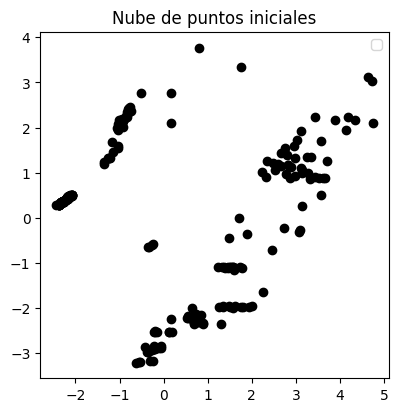

In [565]:
# Visualizado de datos
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X_ohe[:, 0],
    y = X_ohe[:, 1],
    c = 'black',
    marker    = 'o',
    edgecolor = 'black'
)
ax.legend()
ax.set_title('Nube de puntos iniciales')

In [566]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

# Definir los rangos de valores para eps y min_samples
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = np.arange(2, 11)

# Inicializar variables para almacenar el mejor puntaje de Silhouette y los mejores parámetros
best_score = -1
best_params = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in ParameterGrid({'eps': eps_range, 'min_samples': min_samples_range}):
    # Crear y ajustar el modelo DBSCAN con los parámetros actuales
    dbscan = DBSCAN(**params)
    clusters = dbscan.fit_predict(X_ohe)
    
    # Calcular el puntaje de Silhouette para evaluar la calidad del clustering
    score = silhouette_score(X_ohe, clusters)
    
    # Actualizar el mejor puntaje y los mejores parámetros si se encuentra un puntaje mejor
    if score > best_score:
        best_score = score
        best_params = params

# Imprimir los mejores parámetros y su puntaje de Silhouette correspondiente
print("Mejores parámetros encontrados:")
print(best_params)

Mejores parámetros encontrados:
{'eps': 0.8, 'min_samples': 7}


In [567]:
dbscan = DBSCAN(eps=0.8, min_samples=7)
dbscan.fit(X_ohe)

DBSCAN(eps=0.8, min_samples=7)

Text(0.5, 1.0, 'Clusterings generados por DBSCAN')

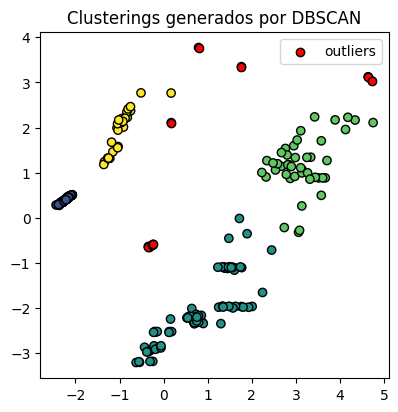

In [568]:
# Gráfico y mostrar clusters
labels = dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X_ohe[:, 0],
    y = X_ohe[:, 1],
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X_ohe[labels == -1, 0],
    y = X_ohe[labels == -1, 1],
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN')

In [569]:
# Número de clusters y observaciones "outliers"
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 4
Número de outliers encontrados: 9


In [570]:
# Evaluar la eficiencia del clustering
# Coeficiente de Silhouette
silhouette = silhouette_score(X_ohe, clusters)
print("Coeficiente de Silhouette:", silhouette)

# Puntuación de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_ohe, clusters)
print("Índice de Calinski-Harabasz:", calinski_harabasz)

Coeficiente de Silhouette: 0.6476828186095978
Índice de Calinski-Harabasz: 343.53517762330364


#### 4.3.1 Predicción para el conjunto de datos con variables codificadas como ordinales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Nube de puntos iniciales')

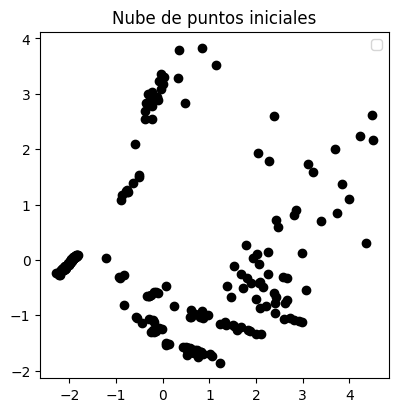

In [571]:
# Visualizado de datos
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X_ordinal[:, 0],
    y = X_ordinal[:, 1],
    c = 'black',
    marker    = 'o',
    edgecolor = 'black'
)
ax.legend()
ax.set_title('Nube de puntos iniciales')

In [572]:
from sklearn.model_selection import ParameterGrid
# Definir los rangos de valores para eps y min_samples
eps_range = np.linspace(0.1, 1.0, 10)
min_samples_range = np.arange(2, 11)

# Inicializar variables para almacenar el mejor puntaje de Silhouette y los mejores parámetros
best_score = -1
best_params = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in ParameterGrid({'eps': eps_range, 'min_samples': min_samples_range}):
    # Crear y ajustar el modelo DBSCAN con los parámetros actuales
    dbscan = DBSCAN(**params)
    clusters = dbscan.fit_predict(X_ordinal)
    
    # Calcular el puntaje de Silhouette para evaluar la calidad del clustering
    score = silhouette_score(X_ordinal, clusters)
    
    # Actualizar el mejor puntaje y los mejores parámetros si se encuentra un puntaje mejor
    if score > best_score:
        best_score = score
        best_params = params

# Imprimir los mejores parámetros y su puntaje de Silhouette correspondiente
print("Mejores parámetros encontrados:")
print(best_params)

Mejores parámetros encontrados:
{'eps': 0.7000000000000001, 'min_samples': 10}


In [573]:
dbscan = DBSCAN(eps=0.7, min_samples=10)
dbscan.fit(X_ordinal)

DBSCAN(eps=0.7, min_samples=10)

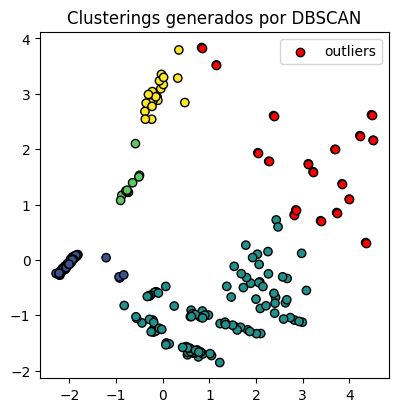

In [574]:
# Gráfico y mostrar clusters
labels = dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X_ordinal[:, 0],
    y = X_ordinal[:, 1],
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X_ordinal[labels == -1, 0],
    y = X_ordinal[labels == -1, 1],
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [575]:
# Número de clusters y observaciones "outliers"
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 4
Número de outliers encontrados: 18


In [576]:
# Evaluar la eficiencia del clustering
# Coeficiente de Silhouette
silhouette = silhouette_score(X_ordinal, clusters)
print("Coeficiente de Silhouette:", silhouette)

# Puntuación de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X_ordinal, clusters)
print("Índice de Calinski-Harabasz:", calinski_harabasz)

Coeficiente de Silhouette: 0.34685813173372443
Índice de Calinski-Harabasz: 53.81843772367154


Al aplicar DBSCAN, el resultado es diferente a cuando se usa K-Means. En este caso, las métricas nos expresan que la agrupación de los datos es mejor cuando el fichero esta codifcado con one-hot-encoding.

### 4.4 Comparativa resultados K-Means versus DBSCAN


El fenómeno observado, donde K-Means demuestra un mejor rendimiento al agrupar los datos con variables ordinales, mientras que DBSCAN exhibe un mejor desempeño al tratar con datos codificados mediante one-hot-encoding, podría atribuirse a las particularidades inherentes a cada algoritmo y su capacidad para manejar diferentes tipos de datos.

En primer lugar, se destaca la naturaleza de K-Means, que presupone clústeres con una forma geométrica esférica y de tamaño similar. Además, este algoritmo se beneficia de estructuras de datos numéricas con una clara interpretación euclidiana. Por lo tanto, las variables ordinales, al ser transformadas a una escala numérica, podrían retener una estructura que facilita la identificación de clústeres coherentes en el espacio reducido por PCA. Esta adecuación podría explicar por qué K-Means muestra un mejor desempeño con los datos ordinales escalados.

Por otro lado, DBSCAN es reconocido por su flexibilidad para identificar clústeres de formas y tamaños variables, dado que no asume una estructura geométrica específica para los clústeres. La codificación mediante one-hot-encoding, al crear una representación de alta dimensionalidad donde cada categoría se convierte en una dimensión binaria independiente, puede resultar en una dispersión de los datos en un espacio de mayor dimensionalidad. Esta característica podría ser ventajosa para DBSCAN, permitiéndole identificar clústeres basados en la densidad de puntos en lugar de formas geométricas predefinidas.

Por tanto, la disparidad en el rendimiento de K-Means y DBSCAN puede atribuirse a cómo cada algoritmo maneja las características específicas de los datos después de la codificación y reducción de dimensionalidad. Mientras que las variables ordinales pueden proporcionar una estructura más congruente para K-Means, las variables codificadas mediante one-hot-encoding podrían resultar más adecuadas para DBSCAN debido a su capacidad para identificar clústeres basados en densidad en espacios de alta dimensionalidad. Este fenómeno subraya la importancia de considerar las propiedades intrínsecas de los datos y los algoritmos al seleccionar un enfoque apropiado para la tarea de clustering.

## 5. Comparativa resultados con codificación ordinal versus one-hot-encoding

Basándonos en los resultados de las métricas, se puede observar que en en las aplicaciones de los algoritmos de clustering los resultados son mejores cuando la codificación de las variables categóricas es ordinal, al menos en K-Means. Esto puede deberse a factores como:

- Información de orden preservada: La codificación ordinal conserva la información sobre el orden o la jerarquía de las categorías, mientras que la codificación one-hot no lo hace. Esto significa que el algoritmo de clustering puede beneficiarse de la estructura ordinal de las variables categóricas para identificar patrones más significativos en los datos.
- Reducción de la dimensionalidad: La codificación ordinal reduce la dimensionalidad del conjunto de datos en comparación con la codificación one-hot, ya que representa cada variable categórica con un solo valor numérico en lugar de crear múltiples columnas binarias. Esto puede ayudar a reducir la complejidad del problema y mejorar la capacidad de los algoritmos de clustering para identificar clusters significativos.
- Menor riesgo de sobreajuste: La codificación ordinal puede ser menos propensa al sobreajuste en comparación con la codificación one-hot, especialmente si el conjunto de datos tiene un número limitado de instancias y muchas categorías distintas en las variables categóricas. La codificación one-hot puede llevar a conjuntos de datos con muchas columnas y un alto riesgo de sobreajuste.
- Mejor captura de relaciones entre categorías: La codificación ordinal puede capturar relaciones o patrones específicos entre las categorías de las variables categóricas que podrían ser importantes para la agrupación de datos. Por ejemplo, si hay una relación natural de orden entre las categorías, como en el caso de las clasificaciones espectrales de estrellas, la codificación ordinal puede reflejar mejor esta relación en el análisis de clustering.

No obstante, la codificación one-hot puede ser útil en otros contextos. Su utilidad puede deberse a factores como:
- Eliminación del sesgo numérico: La codificación one-hot elimina el sesgo numérico que podría surgir al asignar números arbitrarios a las categorías. Al representar las categorías como vectores binarios, no hay implicaciones de orden o magnitud entre las diferentes categorías, lo que evita cualquier sesgo que pueda introducirse al tratar las categorías como valores numéricos.
- Mejora de la capacidad de detección de similitudes: La codificación one-hot puede mejorar la capacidad de los algoritmos de agrupamiento para detectar similitudes entre observaciones en función de la presencia o ausencia de características categóricas compartidas. Esto puede ser especialmente útil en conjuntos de datos donde las categorías representan características importantes pero no numéricas.
- Flexibilidad en la interpretación de resultados: Al codificar las variables categóricas en vectores binarios, los resultados del agrupamiento son más fáciles de interpretar. Cada dimensión binaria representa la presencia o ausencia de una categoría específica, lo que facilita la interpretación de los clústeres en términos de las características representadas por esas categorías.

No obstante, en este caso al haberse realizado un PCA para reducir la dimensionalidad del conjunto de datos, el analizar estas situaciones se vuelve complejo debido a que todos los datos quedan encapsulados en dos factores. Por tanto, se pone de relieve la importancia que es la codificación de los datos de una manera u otra y atendiendo a razones lógicas, de manera que los resultados apunten en la dirección en la que se quiere, y que tenga sentido en función de lo que se quiera estudiar. 

## 6. Pipeline recomendado para realizar el clustering de datos

El término "pipeline" ha surgido como un concepto fundamental en el ámbito del aprendizaje automático y la minería de datos, especialmente en el contexto del clustering de datos. Un pipeline, en este contexto, denota una secuencia ordenada y estructurada de pasos que se aplican sistemáticamente para llevar a cabo tareas de preprocesamiento, entrenamiento de modelos y predicción de clusters en conjuntos de datos. Este enfoque se ha consolidado como una herramienta poderosa y versátil que permite la automatización eficiente y la reproducibilidad de los procesos de análisis de datos, lo que contribuye significativamente al avance de la investigación y la aplicación práctica en diversos campos científicos y tecnológicos.

La naturaleza modular y organizada de un pipeline en clustering de datos proporciona una serie de ventajas clave. En primer lugar, la estructura modular facilita la comprensión y el mantenimiento del código, ya que cada etapa del pipeline se define de manera clara y separada, lo que permite una gestión eficiente de la complejidad del proceso. Además, la encapsulación de todas las operaciones en un único objeto favorece la reproducibilidad de los resultados, lo que es esencial en el contexto de la investigación científica y la validación de modelos. Esto significa que un pipeline puede ser ejecutado en diferentes conjuntos de datos con el mismo flujo de trabajo, lo que garantiza la consistencia y la fiabilidad de los resultados obtenidos.

Otro beneficio significativo del uso de pipelines en clustering de datos es la capacidad de optimizar los hiperparámetros del modelo y las etapas de preprocesamiento de manera sistemática. Esto se logra mediante técnicas como la búsqueda de hiperparámetros mediante validación cruzada, que permite encontrar la configuración óptima que maximiza el rendimiento del modelo en términos de métricas específicas de evaluación, como la inercia o el coeficiente de silueta. La automatización de este proceso mediante pipelines ahorra tiempo y esfuerzo, ya que elimina la necesidad de realizar ajustes manuales y repetitivos de los parámetros.

Además, los pipelines en clustering de datos fomentan la automatización de tareas repetitivas y la estandarización de los flujos de trabajo, lo que contribuye a mejorar la eficiencia y la productividad en el análisis de datos. Por ejemplo, las operaciones de preprocesamiento como la selección de características, la normalización de datos o la detección de valores atípicos pueden integrarse fácilmente en un pipeline, lo que simplifica y agiliza el proceso de análisis.

Teniendo en cuenta los resultados obtenidos, el pipeline aconsejado es primeramente realizar un tratamiento del fichero de datos realizando una codificación que dependerá tanto de la propia naturaleza intrínseca de las variables (lo que representan en el contexto en el que se haya hecho la extracción de los datos), como de los algoritmos que se deseen utilizar, puesto que el desarrollo interno de los mismos determinará cómo la codificación pueda afectar a la forma en la que los datos son clusterizados.

En nuestro caso aquí se realizaría una codificación ordinal de las variables categóricas en el caso de que se deseara aplicar K-Means puesto que esta codificacón resulta en un mayor coeficiente de shilouette, lo cual implica que los clusters están mejor definidos, son más densos, y en definitiva los puntos están mejor agrupados. En caso de que se quisiera usar DBSCAN se optaría por una codifcación one-hot por las razones anteriormente mencionadas. El hecho es, que se debe analizar el impacto que tiene la codificación de los datos en las tareas de aprendizaje automático que se requieran realizar.

En sí, para esta tarea se debería escoger la combinación entre codificación y algoritmo que mejor rendimiento aporte en base a métricas. Analizando los siguientes valores:

- Codificación ordinal y K-Means:
    - Coeficiente de Silueta: 0.6627218475141597
    - Índice Calinski-Harabasz: 688.5101893111259

- Codificación one-hot y K-Means:
    - Coeficiente de Silueta: 0.6420867079323872
    - Índice Calinski-Harabasz: 544.2806376077151

- Codificación one-hot y DBSCAN:
    - Coeficiente de Silhouette: 0.6476828186095978
    - Índice de Calinski-Harabasz: 343.53517762330364

- Codificación ordinal y DBSCAN:
    - Coeficiente de Silhouette: 0.34685813173372443
    - Índice de Calinski-Harabasz: 53.81843772367154

En base a las métricas lo mejor sería utilizar sería coificar el fichero con variables ordinales y el algoritmo K-Means. 

Las métricas de evaluación del rendimiento del agrupamiento, como el coeficiente de silueta y el índice de Calinski-Harabasz, son herramientas comúnmente utilizadas para medir la calidad de los clústeres generados por algoritmos de agrupamiento. Sin embargo, es crucial entender que estas métricas tienen limitaciones y no siempre proporcionan una representación completa del éxito del agrupamiento.

Primero, es importante reconocer que estas métricas dependen en gran medida de la estructura intrínseca de los datos. Esto significa que los resultados pueden estar sesgados por la distribución particular de los datos, lo que puede llevar a interpretaciones erróneas sobre la calidad del agrupamiento.

Además, las métricas de rendimiento del agrupamiento pueden ser sensibles a la inicialización aleatoria y a la configuración de parámetros de los algoritmos de agrupamiento. Esto implica que los resultados pueden variar entre diferentes ejecuciones del algoritmo, lo que dificulta la interpretación y la comparación entre diferentes configuraciones.

Otro aspecto importante a considerar es que las métricas de rendimiento del agrupamiento no tienen en cuenta el contexto del problema o los objetivos específicos del análisis. Esto significa que una puntuación alta en una métrica puede no traducirse necesariamente en una agrupación útil o significativa para el problema en cuestión.

Finalmente, la interpretación de las métricas de rendimiento del agrupamiento puede ser subjetiva y puede variar según las necesidades y expectativas del usuario. Lo que puede considerarse como un buen rendimiento en términos de métricas puede no coincidir necesariamente con la percepción del usuario sobre la calidad del agrupamiento.

En conclusión, aunque las métricas de evaluación del rendimiento del agrupamiento son herramientas valiosas, es esencial interpretarlas con precaución y considerarlas en conjunto con otros factores, como el contexto del problema y la intuición del usuario, para obtener una comprensión completa del éxito del agrupamiento.

Después de seleccionar el conjunto de datos tratado final, y el algoritmo que se le va a aplicar, se hace necesario estudiar la naturaleza del algoritmo. Esto es, considerar la mejor combinación de los hiperparámetros que este tome para maximizar el rendimiento. En este caso, como se ha optado por K-Means es una buena práctica evaluar el rendimiento del modelo en base al número de clusters que se utilicen. El ajuste de este hiperparámetro implica probar diferentes valores de K y evaluar el rendimiento del algoritmo utilizando métricas como la inercia, la silueta o el índice de Calinski-Harabasz en un conjunto de datos de validación o mediante técnicas de validación cruzada.

El número óptimo de clústeres puede variar dependiendo de la estructura subyacente de los datos y de los objetivos específicos del análisis. Se pueden probar diferentes valores de K y evaluar cómo afectan al rendimiento del agrupamiento en términos de cohesión intra-cluster y separación inter-cluster.

Además del número de clústeres, también hay otros hiperparámetros secundarios que pueden afectar al rendimiento del algoritmo, como:

- Inicialización de centroides: K-Means puede ser sensible a la inicialización aleatoria de los centroides. Por lo tanto, se pueden probar diferentes métodos de inicialización, como k-means++ o el muestreo de puntos aleatorios, para obtener mejores resultados.
- Número máximo de iteraciones: El algoritmo K-Means converge cuando los centroides no cambian significativamente entre iteraciones. Se puede establecer un número máximo de iteraciones para controlar el tiempo de ejecución del algoritmo y evitar la convergencia prematura.
- Criterio de convergencia: En algunos casos, se puede definir un criterio de convergencia adicional, como un umbral de cambio mínimo en los centroides, para determinar cuándo detener el algoritmo.
- Método de cálculo de la distancia: K-Means utiliza la distancia euclidiana por defecto para calcular la similitud entre puntos y centroides. Sin embargo, en algunos casos puede ser beneficioso utilizar otras medidas de distancia, como la distancia de Manhattan o la distancia de Mahalanobis, dependiendo de la naturaleza de los datos.

En cuanto al análisis de los resultados, se pueden lleavr a cabo representaciones de los datos en el espacio de dimensiones y mostrar las agrupaciones que se han realizado. Lo más importamte en esta fase es el estudiar en función de los valores de los atributos, qué etiquetas toman los datos con el objetivo de encontrar patrones intrínsecos y relaciones, que es lo que se desarrollará en el siguiente apartado. 

## 7. Comparativa resultados de clustering versus clasificación de estrellas en astronomía

Para poder realizar esta comparativa, se hace necesario tomar una referencia de las categorías de estrellas en astronomía. Esta clasificación se muestra anexa en el enunciado de la práctica y es la siguiente:

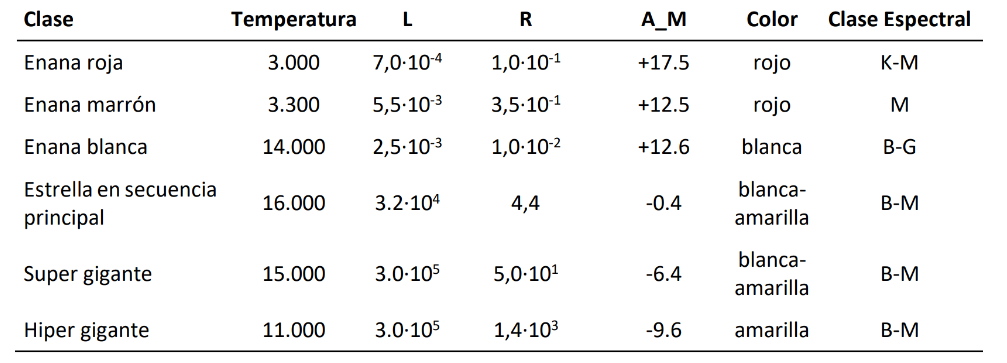

Se debe añadir para cada instancia del conjunto de datos, la etiqueta del cluster al que queda vinculado como una nueva columna en el conjunto de datos original. Recordando, el conjunto de datos original contiene los datos de las variables que caracterizan a las estrellas, sin ningún tipo de codificación ni tratamiento. 

In [577]:
stars_data.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


Sobre este fichero añadimos una columna que se va a llamar clase, en la que se van a añadir las etiquetas de los clusters asignadas tras el proceso seguido para ello a lo largo de la práctica. En este caso vamos a utilizar los resultados del algoritmo que agrupa los datos con más sentido desde el punto de vista de la clasificación dada. En esta clasificación, se tienen 6 tipos de estrellas en función de una serie de valores para cada característica. En las cuatro combinaciones de codificación de datos y algoritmo aplicado, el único que agrupa los datos en 6 clusters de manera que el valor de las métricas se optimiza, es en principio, el algoritmo de K-Means con codificación ordinal. 

Por consiguiente, se van a utilizar los resultados de este algoritmo y van a ser los que se añadan en forma de columna al fichero de datos original. Los resultados de las etiquetas de los datos se encuentran en la variable predictions_ordinal.

In [578]:
predictions_ordinal

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 3, 3,
       2, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Tenemos que transformar esto en una columna de un dataframe de pandas:

In [579]:
results = pd.DataFrame(predictions_ordinal, columns=["Clase"])
results

,Clase
0,1
1,1
2,1
3,1
4,1
...,...
235,2
236,2
237,2
238,2


Ahora podemos concatenar el fichero de datos original con esta columna:

In [580]:
stars_results = pd.concat([stars_data, results], axis=1)
stars_results.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
0,3068,0.002400,0.1700,16.12,Red,M,1
1,3042,0.000500,0.1542,16.60,Red,M,1
2,2600,0.000300,0.1020,18.70,Red,M,1
3,2800,0.000200,0.1600,16.65,Red,M,1
4,1939,0.000138,0.1030,20.06,Red,M,1


Teniendo el fichero con los datos de las caracterísitcas y las etiquetas de los clusters asociadas a estos, para cada instancia de los datos ahora se deben ir filtrando los datos de las caracterísitcas para ver cómo en función de los valores que toman, las estrellas están clasificadas.

In [581]:
grupo_0 = stars_results[stars_results['Clase']==0]
grupo_0.sample(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
84,14100,0.000670,0.00890,12.17,Blue-White,B,0
209,19360,0.001250,0.00998,11.62,Blue,B,0
20,25000,0.056000,0.00840,10.58,Blue-White,B,0
25,12990,0.000085,0.00984,12.23,White-Yellow,F,0
88,13720,0.000180,0.00892,12.97,White,F,0
85,9675,0.000450,0.01090,13.98,Blue-White,A,0
140,13420,0.000590,0.00981,13.67,Blue-White,B,0
212,13089,788.000000,5.99200,-0.12,Blue-White,A,0
28,11790,0.000150,0.01100,12.59,White-Yellow,F,0
201,15680,0.001220,0.01140,11.92,Blue,B,0


Vemos que existe una alta desviación para los datos en estas variables. Habría que tratar los valores extremos, por ejemplo para la variable temperatura:

In [582]:
from scipy.stats import zscore

# Calcular z-scores para todas las columnas numéricas
z_scores =  grupo_0.select_dtypes(include=['number']).apply(zscore)

# Encontrar filas que contienen valores atípicos en al menos una columna numérica
outliers_mask = (z_scores.abs() > 3).any(axis=1)

# Filtrar DataFrame para excluir filas con valores atípicos
grupo_0 = grupo_0[~outliers_mask]


In [583]:
grupo_0.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
20,25000,0.05600,0.00840,10.58,Blue-White,B,0
21,7740,0.00049,0.01234,14.02,White,A,0
22,7220,0.00017,0.01100,14.23,White,F,0
23,8500,0.00050,0.01000,14.50,White,A,0
24,16500,0.01300,0.01400,11.89,Blue-White,B,0


In [584]:
# Calcular la media de las variables numéricas
numeric_mean = grupo_0[['Temperature', 'L', 'R', 'A_M']].median()
color_mode = grupo_0['Color'].mode()[0]
spectral_mode = grupo_0['Spectral_Class'].mode()[0]

# Crear un nuevo DataFrame con los resultados
result_data = {
    'Clase': 0,
    'Temperature': [numeric_mean['Temperature']],
    'L': [numeric_mean['L']],
    'R': [numeric_mean['R']],
    'A_M': [numeric_mean['A_M']],
    'Color': [color_mode],
    'Spectral_Class': [spectral_mode]
}

result_df = pd.DataFrame(result_data)

result_df

,Clase,Temperature,L,R,A_M,Color,Spectral_Class
0,0,11790.0,0.00118,0.0116,11.66,Blue-White,B


Este clusters podría asimilarse a la enana blanca:

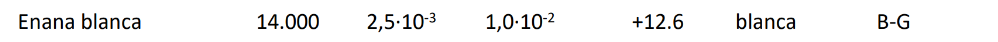

In [585]:
grupo_1 = stars_results[stars_results['Clase']==1]
grupo_1

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
0,3068,0.002400,0.1700,16.120,Red,M,1
1,3042,0.000500,0.1542,16.600,Red,M,1
2,2600,0.000300,0.1020,18.700,Red,M,1
3,2800,0.000200,0.1600,16.650,Red,M,1
4,1939,0.000138,0.1030,20.060,Red,M,1
...,...,...,...,...,...,...,...
195,3598,0.002700,0.6700,13.667,Red,M,1
196,3142,0.001320,0.2580,14.120,Red,M,1
197,3496,0.001250,0.3360,14.940,Red,M,1
198,3324,0.006500,0.4710,12.780,Red,M,1


In [586]:
# Calcular z-scores para todas las columnas numéricas
z_scores =  grupo_1.select_dtypes(include=['number']).apply(zscore)

# Encontrar filas que contienen valores atípicos en al menos una columna numérica
outliers_mask = (z_scores.abs() > 3).any(axis=1)

# Filtrar DataFrame para excluir filas con valores atípicos
grupo_1 = grupo_1[~outliers_mask]

In [587]:
grupo_1.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
0,3068,0.002400,0.1700,16.12,Red,M,1
1,3042,0.000500,0.1542,16.60,Red,M,1
2,2600,0.000300,0.1020,18.70,Red,M,1
3,2800,0.000200,0.1600,16.65,Red,M,1
4,1939,0.000138,0.1030,20.06,Red,M,1


In [588]:
# Calcular la media de las variables numéricas
numeric_mean = grupo_1[['Temperature', 'L', 'R', 'A_M']].median()
color_mode = grupo_1['Color'].mode()[0]
spectral_mode = grupo_1['Spectral_Class'].mode()[0]

# Crear un nuevo DataFrame con los resultados
result_data = {
    'Clase': 1,
    'Temperature': [numeric_mean['Temperature']],
    'L': [numeric_mean['L']],
    'R': [numeric_mean['R']],
    'A_M': [numeric_mean['A_M']],
    'Color': [color_mode],
    'Spectral_Class': [spectral_mode]
}

result_df = pd.DataFrame(result_data)

result_df

,Clase,Temperature,L,R,A_M,Color,Spectral_Class
0,1,3169.0,0.000944,0.16,14.865,Red,M


Este cluster podría asimilarse a la enana roja de la tabla de datos:



In [589]:
grupo_2 = stars_results[stars_results['Clase']==2]
grupo_2

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
101,40000,813000.0,14.0,-6.230,Blue,O,2
173,26000,316000.0,1679.0,-9.100,Blue,B,2
176,18000,200000.0,1045.0,-8.300,Blue,O,2
177,11000,170000.0,1779.0,-9.900,Blue-White,B,2
179,24490,248490.0,1134.5,-8.240,Blue-White,B,2
226,9892,593900.0,80.0,-7.262,Blue,O,2
227,10930,783930.0,25.0,-6.224,Blue,O,2
229,21738,748890.0,92.0,-7.346,Blue,O,2
230,24145,382993.0,1494.0,-8.840,Blue-White,B,2
231,38234,272830.0,1356.0,-9.290,Blue,O,2


In [590]:
# Calcular z-scores para todas las columnas numéricas
z_scores =  grupo_2.select_dtypes(include=['number']).apply(zscore)

# Encontrar filas que contienen valores atípicos en al menos una columna numérica
outliers_mask = (z_scores.abs() > 3).any(axis=1)

# Filtrar DataFrame para excluir filas con valores atípicos
grupo_2 = grupo_2[~outliers_mask]

In [591]:
grupo_2

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
101,40000,813000.0,14.0,-6.230,Blue,O,2
173,26000,316000.0,1679.0,-9.100,Blue,B,2
176,18000,200000.0,1045.0,-8.300,Blue,O,2
177,11000,170000.0,1779.0,-9.900,Blue-White,B,2
179,24490,248490.0,1134.5,-8.240,Blue-White,B,2
226,9892,593900.0,80.0,-7.262,Blue,O,2
227,10930,783930.0,25.0,-6.224,Blue,O,2
229,21738,748890.0,92.0,-7.346,Blue,O,2
230,24145,382993.0,1494.0,-8.840,Blue-White,B,2
231,38234,272830.0,1356.0,-9.290,Blue,O,2


Aquí se puede apreciar que hay valores de temperatura con mucha dispersión, y que no se están detectando como outliers. Planteemos otro método.

In [592]:
# Seleccionar solo las columnas numéricas
columnas_numericas = grupo_2.select_dtypes(include=['number'])

# Calcular el rango intercuartílico (IQR)
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Encontrar outliers
outliers = ((columnas_numericas < umbral_inferior) | (columnas_numericas > umbral_superior)).any(axis=1)

# Filtrar DataFrame para excluir outliers
grupo_2 = grupo_2[~outliers]

In [593]:
grupo_2

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
173,26000,316000.0,1679.0,-9.10,Blue,B,2
176,18000,200000.0,1045.0,-8.30,Blue,O,2
177,11000,170000.0,1779.0,-9.90,Blue-White,B,2
179,24490,248490.0,1134.5,-8.24,Blue-White,B,2
230,24145,382993.0,1494.0,-8.84,Blue-White,B,2
231,38234,272830.0,1356.0,-9.29,Blue,O,2
232,32489,648430.0,1948.5,-10.84,Blue,O,2
233,27739,849420.0,1252.0,-7.59,Blue-White,B,2
234,21904,748490.0,1130.0,-7.67,Blue-White,B,2
235,38940,374830.0,1356.0,-9.93,Blue,O,2


In [594]:
# Calcular la media de las variables numéricas
numeric_mean = grupo_2[['Temperature', 'L', 'R', 'A_M']].mean()
color_mode = grupo_2['Color'].mode()[0]
spectral_mode = grupo_2['Spectral_Class'].mode()[0]

# Crear un nuevo DataFrame con los resultados
result_data = {
    'Clase': 2,
    'Temperature': [numeric_mean['Temperature']],
    'L': [numeric_mean['L']],
    'R': [numeric_mean['R']],
    'A_M': [numeric_mean['A_M']],
    'Color': [color_mode],
    'Spectral_Class': [spectral_mode]
}

result_df = pd.DataFrame(result_data)

result_df

,Clase,Temperature,L,R,A_M,Color,Spectral_Class
0,2,24980.428571,448775.785714,1406.142857,-9.292143,Blue,B


En el caso de este hay ciertos valores como R, A_M y Spectral Class que son prácticamente idénticos a la categoría de estrella Hiper gigante, como puede verse a continuación:

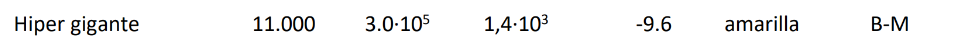

No obstante, la temperatura, la L y el color no se corresponden con esta clasificación.

In [595]:
grupo_3 = stars_results[stars_results['Clase']==3]
grupo_3

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
50,3490,270000.0,1520.0,-9.40,Red,M,3
51,3750,283000.0,1260.0,-7.63,Red,M,3
52,3834,272000.0,1183.0,-9.20,Red,M,3
53,3749,550000.0,1648.0,-8.05,Orange,M,3
54,3650,310000.0,1324.0,-7.79,Red,M,3
55,3450,263000.0,1349.0,-11.75,Red,M,3
56,3660,363000.0,1673.0,-11.92,Red,M,3
57,3450,174000.0,1284.0,-11.28,Red,M,3
58,3752,209000.0,955.0,-11.24,Red,M,3
59,3535,195000.0,1546.0,-11.36,Red,M,3


In [596]:
# Calcular z-scores para todas las columnas numéricas
z_scores =  grupo_3.select_dtypes(include=['number']).apply(zscore)

# Encontrar filas que contienen valores atípicos en al menos una columna numérica
outliers_mask = (z_scores.abs() > 3).any(axis=1)

# Filtrar DataFrame para excluir filas con valores atípicos
grupo_3 = grupo_3[~outliers_mask]

In [597]:
grupo_3.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
50,3490,270000.0,1520.0,-9.40,Red,M,3
51,3750,283000.0,1260.0,-7.63,Red,M,3
52,3834,272000.0,1183.0,-9.20,Red,M,3
53,3749,550000.0,1648.0,-8.05,Orange,M,3
54,3650,310000.0,1324.0,-7.79,Red,M,3


In [598]:
# Calcular la media de las variables numéricas
numeric_mean = grupo_3[['Temperature', 'L', 'R', 'A_M']].median()
color_mode = grupo_3['Color'].mode()[0]
spectral_mode = grupo_3['Spectral_Class'].mode()[0]

# Crear un nuevo DataFrame con los resultados
result_data = {
    'Clase': 3,
    'Temperature': [numeric_mean['Temperature']],
    'L': [numeric_mean['L']],
    'R': [numeric_mean['R']],
    'A_M': [numeric_mean['A_M']],
    'Color': [color_mode],
    'Spectral_Class': [spectral_mode]
}

result_df = pd.DataFrame(result_data)

result_df

,Clase,Temperature,L,R,A_M,Color,Spectral_Class
0,3,3607.5,204500.0,1384.5,-10.755,Red,M


En este caso ocurre algo parecido al del caso anterior, en Temperatura, Color y Spectral_Class se asemeja en gran medida a la categoría de enana marrón:

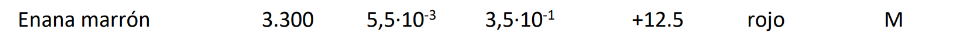

No obstante, L, R y A_M no se corresponden con dicha clasificación.

In [599]:
grupo_4 = stars_results[stars_results['Clase']==4]
grupo_4

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
30,39000,204000.0,10.600,-4.700,Blue,O,4
31,30000,28840.0,6.300,-4.200,Blue-White,B,4
49,33750,220000.0,26.000,-6.100,Blue,B,4
99,36108,198000.0,10.200,-4.400,Blue,O,4
100,33300,240000.0,12.000,-6.500,Blue,B,4
102,23000,127000.0,36.000,-5.760,Blue,O,4
103,17120,235000.0,83.000,-6.890,Blue,O,4
104,11096,112000.0,12.000,-5.910,Blue,O,4
105,14245,231000.0,42.000,-6.120,Blue,O,4
106,24630,363000.0,63.000,-5.830,Blue,O,4


In [600]:
# Calcular z-scores para todas las columnas numéricas
z_scores =  grupo_4.select_dtypes(include=['number']).apply(zscore)

# Encontrar filas que contienen valores atípicos en al menos una columna numérica
outliers_mask = (z_scores.abs() > 3).any(axis=1)

# Filtrar DataFrame para excluir filas con valores atípicos
grupo_4 = grupo_4[~outliers_mask]

In [601]:
grupo_4

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
30,39000,204000.0,10.600,-4.700,Blue,O,4
31,30000,28840.0,6.300,-4.200,Blue-White,B,4
49,33750,220000.0,26.000,-6.100,Blue,B,4
99,36108,198000.0,10.200,-4.400,Blue,O,4
100,33300,240000.0,12.000,-6.500,Blue,B,4
102,23000,127000.0,36.000,-5.760,Blue,O,4
103,17120,235000.0,83.000,-6.890,Blue,O,4
104,11096,112000.0,12.000,-5.910,Blue,O,4
105,14245,231000.0,42.000,-6.120,Blue,O,4
106,24630,363000.0,63.000,-5.830,Blue,O,4


In [602]:
# Seleccionar solo las columnas numéricas
columnas_numericas = grupo_4.select_dtypes(include=['number'])

# Calcular el rango intercuartílico (IQR)
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Encontrar outliers
outliers = ((columnas_numericas < umbral_inferior) | (columnas_numericas > umbral_superior)).any(axis=1)

# Filtrar DataFrame para excluir outliers
grupo_4 = grupo_4[~outliers]

In [603]:
# Calcular la media de las variables numéricas
numeric_mean = grupo_4[['Temperature', 'L', 'R', 'A_M']].mean()
color_mode = grupo_4['Color'].mode()[0]
spectral_mode = grupo_4['Spectral_Class'].mode()[0]

# Crear un nuevo DataFrame con los resultados
result_data = {
    'Clase': 4,
    'Temperature': [numeric_mean['Temperature']],
    'L': [numeric_mean['L']],
    'R': [numeric_mean['R']],
    'A_M': [numeric_mean['A_M']],
    'Color': [color_mode],
    'Spectral_Class': [spectral_mode]
}

result_df = pd.DataFrame(result_data)

result_df

,Clase,Temperature,L,R,A_M,Color,Spectral_Class
0,4,21966.731707,181171.926829,33.16,-5.359512,Blue,O


En este caso L, R, A_M son muy similares a lo que se podría considerar una Super gigante:

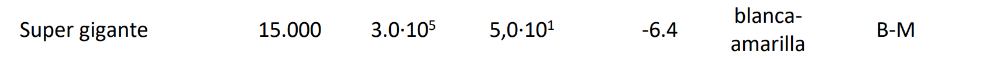

La temperatura se aleja en mayor medida, y color y clase espectral no se corresponde. 

In [604]:
grupo_5 = stars_results[stars_results['Clase']==5]
grupo_5

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
40,3826,200000.0,19.0,-6.93,Red,M,5
41,3365,340000.0,23.0,-6.20,Red,M,5
42,3270,150000.0,88.0,-6.02,Red,M,5
43,3200,195000.0,17.0,-7.22,Red,M,5
44,3008,280000.0,25.0,-6.00,Red,M,5
45,3600,320000.0,29.0,-6.60,Red,M,5
46,3575,123000.0,45.0,-6.78,Red,M,5
47,3574,200000.0,89.0,-5.24,Red,M,5
48,3625,184000.0,84.0,-6.74,Red,M,5
117,3625,74000.0,876.0,-10.25,Red,M,5


In [605]:
# Calcular z-scores para todas las columnas numéricas
z_scores =  grupo_5.select_dtypes(include=['number']).apply(zscore)

# Encontrar filas que contienen valores atípicos en al menos una columna numérica
outliers_mask = (z_scores.abs() > 3).any(axis=1)

# Filtrar DataFrame para excluir filas con valores atípicos
grupo_5 = grupo_5[~outliers_mask]

In [606]:
# Seleccionar solo las columnas numéricas
columnas_numericas = grupo_5.select_dtypes(include=['number'])

# Calcular el rango intercuartílico (IQR)
Q1 = columnas_numericas.quantile(0.25)
Q3 = columnas_numericas.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Encontrar outliers
outliers = ((columnas_numericas < umbral_inferior) | (columnas_numericas > umbral_superior)).any(axis=1)

# Filtrar DataFrame para excluir outliers
grupo_5 = grupo_5[~outliers]

In [607]:
# Calcular la media de las variables numéricas
numeric_mean = grupo_5[['Temperature', 'L', 'R', 'A_M']].median()
color_mode = grupo_5['Color'].mode()[0]
spectral_mode = grupo_5['Spectral_Class'].mode()[0]

# Crear un nuevo DataFrame con los resultados
result_data = {
    'Clase': 5,
    'Temperature': [numeric_mean['Temperature']],
    'L': [numeric_mean['L']],
    'R': [numeric_mean['R']],
    'A_M': [numeric_mean['A_M']],
    'Color': [color_mode],
    'Spectral_Class': [spectral_mode]
}

result_df = pd.DataFrame(result_data)

result_df

,Clase,Temperature,L,R,A_M,Color,Spectral_Class
0,5,3574.0,200000.0,29.0,-6.6,Red,M


En este caso este cluster comparte caracterísitcas con otros anteriores, color, temperatura y clase espectral se asemejan a la enana roja, el radio y la magnitud absoluta son similares a las super gigantes y la L tiene un orden mayor que las hiper gigantes. Estre cluster parece una mezcla respecto de los valores medios y modales que toman otros.

La única categoría que no ha sido identificada de una manera más o menos razonable ha sido la de estrella en secuencia principal, cuyos valores para los atributos son:

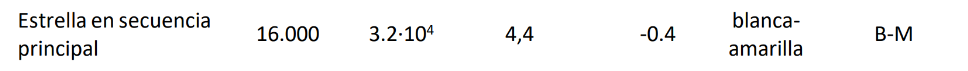

Podemos hacer un poco de research sobre el conjunto de datos de resultados para ver si existe algún subcluster dentro de los ya estudiados en los que existan instancias similares a esta que hayan sido clasificadas dentro de los mismos. Voy a filtrar por las variables que más carga factorial tienen, puesto que han sido las que más influencia habrán tenido a la hora de agrupar los datos en base a las dos dimensiones existentes tras el PCA (puesto que al algoritmo de clustering no se le ha pasado realmente el dataframe con todos los atributos)

Para el fichero codificado ordinalmente, la clase espectral es la variable que más carga factorial tiene para el factor 1, y para el factor 2 es el radio.

In [608]:
# Para ello filtramos por caracterísitcas similares
secuencia_principal = stars_results[((stars_results['Spectral_Class'] == 'B') | (stars_results['Spectral_Class'] == 'M')) & ((stars_results['R'] > 0 )&(stars_results['R'] < 10))]
secuencia_principal

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
0,3068,0.002400,0.17000,16.12,Red,M,1
1,3042,0.000500,0.15420,16.60,Red,M,1
2,2600,0.000300,0.10200,18.70,Red,M,1
3,2800,0.000200,0.16000,16.65,Red,M,1
4,1939,0.000138,0.10300,20.06,Red,M,1
...,...,...,...,...,...,...,...
209,19360,0.001250,0.00998,11.62,Blue,B,0
210,22350,12450.000000,6.36000,-3.67,Blue-White,B,4
213,22012,6748.000000,6.64000,-2.55,Blue-White,B,4
217,19400,10920.000000,6.03000,-3.08,Blue-White,B,4


In [609]:
# Calcular la media de las variables numéricas
numeric_mean = secuencia_principal[['Temperature', 'L', 'R', 'A_M']].median()
color_mode = secuencia_principal['Color'].mode()[0]
spectral_mode = secuencia_principal['Spectral_Class'].mode()[0]

# Crear un nuevo DataFrame con los resultados
result_data = {
    'Clase': 5,
    'Temperature': [numeric_mean['Temperature']],
    'L': [numeric_mean['L']],
    'R': [numeric_mean['R']],
    'A_M': [numeric_mean['A_M']],
    'Color': [color_mode],
    'Spectral_Class': [spectral_mode]
}

result_df = pd.DataFrame(result_data)

result_df

,Clase,Temperature,L,R,A_M,Color,Spectral_Class
0,5,3419.0,0.00118,0.129,12.9,Red,M


Si añadimos algún filtro más, podremos discernir más. Podemos añadir una magnitud absoluta menor que 0.

In [610]:
secuencia_principal = secuencia_principal[(secuencia_principal['A_M'] < 0 )]
secuencia_principal

,Temperature,L,R,A_M,Color,Spectral_Class,Clase
31,30000,28840.0,6.300,-4.20,Blue-White,B,4
32,15276,1136.0,7.200,-1.97,Blue-White,B,0
150,29560,188000.0,6.020,-4.01,Blue-White,B,4
153,16390,1278.0,5.680,-3.32,Blue-White,B,4
154,25070,14500.0,5.920,-3.98,Blue-White,B,4
155,28700,16790.0,6.400,-4.09,Blue-White,B,4
156,26140,14520.0,5.490,-3.80,Blue-White,B,4
157,20120,4720.0,6.780,-3.40,Blue-White,B,4
210,22350,12450.0,6.360,-3.67,Blue-White,B,4
213,22012,6748.0,6.640,-2.55,Blue-White,B,4


De manera poco precisa podría pensarse que las características de la estrella en secuencia principal se están agrupando en el cluster 4, que es el que corresponde con la Super gigante. Esto realmente podría llegar a tener sentido puesto que los valores que toman los atributos de ambos tipos de estrellas son de rango no extremadamente dispares.

El hecho de que la mayoría de las clasificaciones no sean exactas al final pone de relieve el hecho de que las métricas no son un indicador fiable para medir el rendimiento del agrupamiento de los datos. De hecho, puede ser que otro algoritmo con peor valor en las métricas exhibiera un mejor comportamiento en cuanto a la categorización de las estrellas de acuerdo a la de referencia de la práctica.

Un algoritmo de agrupamiento puede agrupar bien los datos en función de algunas características y no respecto a otras debido a varios factores:

- Sensibilidad a la escala y tipo de características: Algunos algoritmos de agrupamiento, como K-Means, son sensibles a la escala de las características. Si las características tienen escalas muy diferentes o si algunas características tienen mayor variabilidad que otras, el algoritmo puede dar más peso a las características con mayor variabilidad, lo que podría sesgar los resultados del agrupamiento.
- Relevancia de las características para la estructura de los datos: Las características que son más relevantes para la estructura subyacente de los datos tendrán un mayor impacto en el proceso de agrupamiento. Si algunas características son más informativas o discriminativas que otras para distinguir entre diferentes clases o grupos de datos, es más probable que el algoritmo de agrupamiento las utilice como criterio principal para formar los clústeres.
- Interacciones complejas entre características: En algunos casos, las relaciones entre las características pueden ser complejas y no lineales. Los algoritmos de agrupamiento pueden tener dificultades para capturar estas interacciones complejas, lo que puede resultar en agrupamientos que se basan principalmente en algunas características mientras ignoran otras.
- Configuración de parámetros: La configuración de parámetros de un algoritmo de agrupamiento puede influir en cómo se forman los clústeres y qué características se priorizan en el proceso de agrupamiento. Si los parámetros no están ajustados adecuadamente, el algoritmo puede dar más peso a ciertas características en detrimento de otras.
Variedad en la distribución de las características: Si las características tienen distribuciones diferentes, con algunas siendo más dispersas o con una mayor concentración de valores en ciertos rangos, el algoritmo puede agrupar más fácilmente los datos en función de esas características con distribuciones más distintivas.

En el caso específico de la clasificación de estrellas, es posible que algunas características sean más representativas de ciertas categorías de estrellas que otras, lo que lleva a un mejor agrupamiento en función de esas características más representativas. Además, la sensibilidad del algoritmo de agrupamiento a la escala, la relevancia y la complejidad de las interacciones entre las características pueden influir en cómo se forman los clústeres y qué características se priorizan en el proceso de agrupamiento.

Asimismo, el hecho de reducir la dimensionalidad mediante PCA, antes de que los datos fueran pasados al algoritmo de clustering, también influye en el peso que tienen las características a la hora de hacer el clustering, puesto que no todas tienen contribuciones a los factores que se definieron tras la aplicación de este análisis factorial. Por tanto, era esperable que no todos los atributos encajaran bien a la hora de identificar los clusters con la categorización real, puesto que no todos han tenido la misma influencia a la hora de agrupar las instancias de datos.
